In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import time

In [15]:
k0 = 1
m = 1

T = 1
Nscale = 0
L = 400
M = 20000
N = int(10*T)
x = np.linspace(-L, L, M + 1)
dx = 2*L/M
dt = T/(N + 1)
#---------------------------------------------------------
#time_seconds = np.log(N) * M**3 * 1.8e-10
time_seconds = N * M**2 * 6e-9
hours = int(time_seconds // 3600)
minutes = int((time_seconds % 3600) // 60)
seconds = int(time_seconds % 60)
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
print(f"Estimated time: {hours}h {minutes}min {seconds}s")
coK = dx * (m/(2*np.pi*1j*dt))**(1/2)
coK_power = coK**(N+1)
print(f'coeff of K = {coK}')
print(f'coeff of K^(N+1) = {coK_power}')
print(f'|coeff of K^(N+1)|^2 = {(coK_power.real)**2 + (coK_power.imag)**2}')

(T=1, L=400, M=20000, N=10, (Nscale=0))
Estimated time: 0h 0min 24s
coeff of K = (0.03742410318509556-0.03742410318509556j)
coeff of K^(N+1) = (-6.4537984614450555e-15-6.4537984614450555e-15j)
|coeff of K^(N+1)|^2 = 8.330302916190113e-29


In [16]:
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
psi_0 = (2 / np.pi)**(1/4) * np.exp(- x**2 + 1j * k0 * x)
'''
K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
'''
# Assuming x is a NumPy array
x = np.asarray(x)
X_i, X_j = np.meshgrid(x, x, indexing='ij')
K = np.exp(1j * (m / 2 * (X_i - X_j)**2 / dt)) #(m / (2 * np.pi * 1j * dt))**0.5 * 
#print(f'condition(K) = {np.linalg.cond(K)}')

run_time_start = time.time()
#KpowerN = K
#for i in range(N):
#    KpowerN = KpowerN @ K # K^{N + 1}
psi_final = psi_0
for i in range(N+1):
    psi_final = K @ psi_final #dx *
psi_final = coK_power * psi_final
run_time_end = time.time()

#print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')
print(f't/complexity = {(run_time_end-run_time_start)/(N * M**2)}')
np.save('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy', psi_final)

(T=1, L=400, M=20000, N=10, (Nscale=0))
t/complexity = 1.0591229200363159e-09


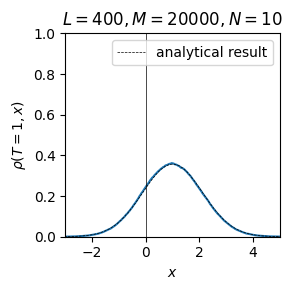

A = 4.373176 * 10^(29)


In [17]:
load = 0
if load == 0:
    psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
else: # load == 1
    psi_final = np.load('data/(T=0.5, L=400, M=12000, N=5, (Nscale=0)) - psi_final.npy')
    T=0.5
    L=400
    M=12000
    N=5

rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 5
xmin = -3
x = np.linspace(-L, L, M+1)
dx = 2*L/M
rho_renormalized = []
for i in range(len(psi_final)):
    if x[i] + dx > xmin and x[i] - dx < xmax:
        rho_renormalized.append(rho_final[i])
    else:
        rho_renormalized.append(0)
rho_renormalized = np.array(rho_renormalized)
A = sum(rho_renormalized) * dx
rho_renormalized = rho_renormalized / A
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x, rho_renormalized)
m=1
k0=1
psi_analytically = (2/np.pi)**(1/4) * np.sqrt(m/(m + 1j * 2 * T)) * np.exp(m/(m + 1j * 2 * T) * (- x**2 + 1j * k0 * x) - 1j * k0**2 / (2 * (m + 1j * 2 * T)) * T)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
ax.plot(x, rho_analytically, linestyle='--', linewidth=0.5, color='black', label='analytical result')
ax.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax.set_title('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho(T = '+f'{T}'+', x)$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.savefig('path integral numerically (normalized) of a free particle with initial state as a Gaussian wave packet and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()

Ascale = int(np.log(rho_final[int(M/2)])/np.log(10))
print(f'A = {(rho_final[int(M/2)] / 10**Ascale):1f} * 10^({Ascale})')